In [1]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.metrics import confusion_matrix



In [3]:
dta0_01 = pd.read_csv('data/raw/jan2023.csv')
dta0_02 = pd.read_csv('data/raw/fev2023.csv')
dta0_03 = pd.read_csv('data/raw/mar2023.csv')
dta0_04 = pd.read_csv('data/raw/abr2023.csv')
dta0_05 = pd.read_csv('data/raw/mai2023.csv')
dta0_06 = pd.read_csv('data/raw/jun2023.csv')
dta0_07 = pd.read_csv('data/raw/jul2023.csv')
dta0_08 = pd.read_csv('data/raw/ago2023.csv')
dta0_09 = pd.read_csv('data/raw/set2023.csv')
dta0_10 = pd.read_csv('data/raw/out2023.csv')
dta0_11 = pd.read_csv('data/raw/nov2023.csv')
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')
data0_4 = pd.read_csv('data/raw/abr2024.csv')
data0_5 = pd.read_csv('data/raw/mai2024.csv')

feat_drop = ['Nome do fundo','CNPJ do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

feat_dropt = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

cpj01 = dta0_01['CNPJ do fundo'].loc[ (dta0_01['Cotistas'] > 100) & (dta0_01['Classe N1'] == 'Ações')].values
cpj02 = dta0_02['CNPJ do fundo'].loc[ (dta0_02['Cotistas'] > 100) & (dta0_02['Classe N1'] == 'Ações')].values
cpj03 = dta0_03['CNPJ do fundo'].loc[ (dta0_03['Cotistas'] > 100) & (dta0_03['Classe N1'] == 'Ações')].values
cpj04 = dta0_04['CNPJ do fundo'].loc[ (dta0_04['Cotistas'] > 100) & (dta0_04['Classe N1'] == 'Ações')].values
cpj05 = dta0_05['CNPJ do fundo'].loc[ (dta0_05['Cotistas'] > 100) & (dta0_05['Classe N1'] == 'Ações')].values     
cpj06 = dta0_06['CNPJ do fundo'].loc[ (dta0_06['Cotistas'] > 100) & (dta0_06['Classe N1'] == 'Ações')].values     
cpj07 = dta0_07['CNPJ do fundo'].loc[ (dta0_07['Cotistas'] > 100) & (dta0_07['Classe N1'] == 'Ações')].values        
cpj08 = dta0_08['CNPJ do fundo'].loc[ (dta0_08['Cotistas'] > 100) & (dta0_08['Classe N1'] == 'Ações')].values        
cpj09 = dta0_09['CNPJ do fundo'].loc[ (dta0_09['Cotistas'] > 100) & (dta0_09['Classe N1'] == 'Ações')].values        
cpj10 = dta0_10['CNPJ do fundo'].loc[ (dta0_10['Cotistas'] > 100) & (dta0_10['Classe N1'] == 'Ações')].values        
cpj11 = dta0_11['CNPJ do fundo'].loc[ (dta0_11['Cotistas'] > 100) & (dta0_11['Classe N1'] == 'Ações')].values
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values
cnpj4 = data0_4['CNPJ do fundo'].loc[ (data0_4['Cotistas'] > 100) & (data0_4['Classe N1'] == 'Ações')].values
cnpj5 = data0_5['CNPJ do fundo'].loc[ (data0_5['Cotistas'] > 100) & (data0_5['Classe N1'] == 'Ações')].values

set1 = set(cpj01)
set2 = set(cpj02)
matches01 = list(set1.intersection(set2))
dta01  = dta0_01.loc[dta0_01['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta01 = dta01.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj02)
set2 = set(cpj03)
matches01 = list(set1.intersection(set2))
dta02  = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta02 = dta02.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj03)
set2 = set(cpj04)
matches01 = list(set1.intersection(set2))
dta03  = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta03 = dta03.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj04)
set2 = set(cpj05)
matches01 = list(set1.intersection(set2))
dta04  = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta04 = dta04.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cpj05)
set2 = set(cpj06)
matches01 = list(set1.intersection(set2))
dta05  = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta05 = dta05.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj06)
set2 = set(cpj07)
matches01 = list(set1.intersection(set2))
dta06  = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta06 = dta06.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj07)
set2 = set(cpj08)
matches01 = list(set1.intersection(set2))
dta07  = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta07 = dta07.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj08)
set2 = set(cpj09)
matches01 = list(set1.intersection(set2))
dta08  = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta08 = dta08.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj09)
set2 = set(cpj10)
matches01 = list(set1.intersection(set2))
dta09  = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta09 = dta09.merge(rent1M, how='inner', on='CNPJ do fundo')
                
set1 = set(cpj10)
set2 = set(cpj11)
matches01 = list(set1.intersection(set2))
dta10  = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta10 = dta10.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj11)
set2 = set(cnpj0)
matches01 = list(set1.intersection(set2))
dta11  = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)]
rent1M = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta11 = dta11.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

data = pd.concat([ dta01, dta02, dta03, dta04, dta05, dta06, dta07, dta08, dta09, dta10, dta11, data0, data1, data2], ignore_index=True)

In [4]:
data.dropna(axis=0, inplace=True)
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

data['Cluster'] = 0
data['Cluster'].loc[ data['Rentabilidade 1M'] < (data['Rentabilidade 1M'].mean() - 0.5*data['Rentabilidade 1M'].std())] = -1.0
data['Cluster'].loc[ data['Rentabilidade 1M'] > (data['Rentabilidade 1M'].mean() + 0.5*data['Rentabilidade 1M'].std())] =  1.0

data.drop(columns='Rentabilidade 1M', inplace=True)

In [5]:
data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,0.216315,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,0.410766,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,-1
2,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,0.410787,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,-1
3,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,0.411428,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,-1
4,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,0.411653,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.008526,0.009829,0.090006,0.219506,0.126052,0.147027,0.132832,0.146756,0.159573,0.190037,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,0
4966,-0.001198,0.005155,0.073624,0.158917,-0.214027,0.128773,0.124416,0.138134,0.152219,0.185158,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,0
4967,0.006550,0.002418,0.069846,0.198901,0.096558,0.147057,0.135088,0.147830,0.155002,0.184016,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,0
4968,0.007336,0.004868,0.075214,0.211160,0.119807,0.146854,0.134897,0.147623,0.154768,0.183797,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,0


In [6]:
s = setup(data, target = 'Cluster', session_id=123, transformation = True, transformation_method='quantile', train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(4970, 73)"
5,Transformed data shape,"(4970, 73)"
6,Transformed train set shape,"(3976, 73)"
7,Transformed test set shape,"(994, 73)"
8,Numeric features,72
9,Preprocess,True


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9218,0.9855,0.9218,0.9225,0.9217,0.8818,0.8822,454.7370
rf,Random Forest Classifier,0.9160,0.9850,0.9160,0.9170,0.9161,0.8731,0.8735,0.2690
et,Extra Trees Classifier,0.9142,0.9851,0.9142,0.9150,0.9142,0.8704,0.8708,0.1770
gbc,Gradient Boosting Classifier,0.8903,0.0000,0.8903,0.8910,0.8901,0.8344,0.8349,2.7120
qda,Quadratic Discriminant Analysis,0.8627,0.0000,0.8627,0.8638,0.8627,0.7928,0.7933,0.1330
knn,K Neighbors Classifier,0.8599,0.9560,0.8599,0.8634,0.8598,0.7881,0.7898,0.3240
dt,Decision Tree Classifier,0.8436,0.8812,0.8436,0.8445,0.8436,0.7636,0.7640,0.1630
lr,Logistic Regression,0.8081,0.0000,0.8081,0.8083,0.8074,0.7105,0.7112,0.4540
ridge,Ridge Classifier,0.7965,0.0000,0.7965,0.7977,0.7955,0.6939,0.6954,0.1360
lda,Linear Discriminant Analysis,0.7892,0.0000,0.7892,0.7902,0.7884,0.6828,0.6840,0.1320


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Create Models

In [8]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9246,0.9882,0.9246,0.9246,0.9246,0.8863,0.8863
1,0.9271,0.9865,0.9271,0.9282,0.9270,0.8897,0.8902
2,0.9422,0.9903,0.9422,0.9420,0.9421,0.9128,0.9128
3,0.8995,0.9799,0.8995,0.9025,0.8995,0.8476,0.8492
4,0.9196,0.9869,0.9196,0.9200,0.9192,0.8788,0.8794
5,0.9196,0.9867,0.9196,0.9208,0.9199,0.8784,0.8787
6,0.9370,0.9859,0.9370,0.9372,0.9369,0.9048,0.9049
7,0.9244,0.9855,0.9244,0.9260,0.9247,0.8857,0.8862
8,0.9043,0.9780,0.9043,0.9042,0.9041,0.8556,0.8557


In [9]:
rf       = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9271,0.9871,0.9271,0.9279,0.9274,0.8901,0.8902
1,0.9070,0.9842,0.9070,0.9071,0.9070,0.8596,0.8597
2,0.9372,0.9927,0.9372,0.9373,0.9371,0.9051,0.9051
3,0.8894,0.9773,0.8894,0.8936,0.8897,0.8322,0.8341
4,0.9121,0.9880,0.9121,0.9128,0.9120,0.8675,0.8680
5,0.9271,0.9872,0.9271,0.9282,0.9274,0.8898,0.8900
6,0.9295,0.9860,0.9295,0.9312,0.9294,0.8931,0.8940
7,0.9270,0.9832,0.9270,0.9280,0.9271,0.8895,0.8899
8,0.8942,0.9775,0.8942,0.8942,0.8942,0.8403,0.8403


In [10]:
et       = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9296,0.9874,0.9296,0.9296,0.9296,0.8938,0.8939
1,0.8995,0.9809,0.8995,0.8999,0.8993,0.8481,0.8484
2,0.9347,0.9915,0.9347,0.9350,0.9345,0.9014,0.9018
3,0.8920,0.9821,0.8920,0.8948,0.8918,0.8361,0.8375
4,0.9221,0.9873,0.9221,0.9221,0.9219,0.8825,0.8827
5,0.9296,0.9878,0.9296,0.9307,0.9299,0.8936,0.8938
6,0.9295,0.9857,0.9295,0.9300,0.9295,0.8933,0.8936
7,0.9093,0.9829,0.9093,0.9104,0.9096,0.8629,0.8632
8,0.8816,0.9773,0.8816,0.8822,0.8818,0.8212,0.8214


## Tuned Models

In [11]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9221,0.9838,0.9221,0.9221,0.9219,0.8826,0.8828
1,0.9196,0.9827,0.9196,0.9202,0.9194,0.8784,0.8788
2,0.9372,0.9895,0.9372,0.9371,0.9371,0.9052,0.9052
3,0.9045,0.9771,0.9045,0.9079,0.9046,0.8552,0.8568
4,0.9246,0.9867,0.9246,0.9253,0.9244,0.8864,0.8869
5,0.9171,0.9859,0.9171,0.9172,0.9171,0.8748,0.8748
6,0.9270,0.9855,0.9270,0.9277,0.9268,0.8894,0.8899
7,0.9169,0.9802,0.9169,0.9178,0.9170,0.8744,0.8747
8,0.9194,0.9785,0.9194,0.9192,0.9192,0.8784,0.8785


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
tuned_rf = tune_model(rf)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:54:26
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8668,0.9589,0.8668,0.8699,0.8663,0.7995,0.8015
1,0.8367,0.9527,0.8367,0.8370,0.8363,0.7536,0.7542
2,0.8970,0.9693,0.8970,0.8985,0.8970,0.8444,0.8451
3,0.8367,0.9483,0.8367,0.8386,0.8363,0.7527,0.7537
4,0.8668,0.9660,0.8668,0.8706,0.8669,0.7998,0.8015
5,0.8844,0.9692,0.8844,0.8844,0.8844,0.8255,0.8255
6,0.8640,0.9642,0.8640,0.8651,0.8632,0.7946,0.7959
7,0.8539,0.9529,0.8539,0.8537,0.8532,0.7801,0.7806
8,0.8463,0.9525,0.8463,0.8500,0.8452,0.7692,0.7719


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
tuned_et = tune_model(et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:55:48
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8819,0.9637,0.8819,0.8831,0.8807,0.8224,0.8241
1,0.8518,0.9662,0.8518,0.8568,0.8513,0.7770,0.7798
2,0.8945,0.9764,0.8945,0.8981,0.8944,0.8409,0.8429
3,0.8719,0.9572,0.8719,0.8715,0.8712,0.8063,0.8067
4,0.8819,0.9759,0.8819,0.8869,0.8816,0.8225,0.8252
5,0.8844,0.9742,0.8844,0.8869,0.8838,0.8261,0.8279
6,0.8816,0.9699,0.8816,0.8822,0.8810,0.8214,0.8223
7,0.8640,0.9612,0.8640,0.8651,0.8631,0.7955,0.7968
8,0.8539,0.9547,0.8539,0.8585,0.8526,0.7806,0.7839


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Finalize Models

In [14]:
final_lightgbm = finalize_model(lightgbm)
final_rf       = finalize_model(rf)
final_et       = finalize_model(et)

In [15]:
final_tuned_lightgbm = finalize_model(tuned_lightgbm)
final_tuned_rf       = finalize_model(tuned_rf)
final_tuned_et       = finalize_model(tuned_et)

## Save Models

In [16]:
save_model(lightgbm, 'lightgbm_1M_04Jul2024')
save_model(rf, 'rf_1M_04Jul2024')
save_model(et, 'et_1M_04Jul2024')

save_model(final_lightgbm, 'final_lightgbm_1M_04Jul2024')
save_model(final_rf, 'final_rf_1M_04Jul2024')
save_model(final_et, 'final_et_1M_04Jul2024')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Rentabilidade No mês',
                                              'Rentabilidade 3 meses',
                                              'Rentabilidade 6 meses',
                                              'Rentabilidade 12 meses',
                                              'Rentabilidade 24 meses',
                                              'Volatilidade No mês',
                                              'Volatili...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=

In [17]:
save_model(tuned_lightgbm, 'tuned_lightgbm_1M_04Jul2024')
save_model(tuned_rf, 'tuned_rf_1M_04Jul2024')
save_model(tuned_et, 'tuned_et_1M_04Jul2024')

save_model(final_tuned_lightgbm, 'final_tuned_lightgbm_1M_04Jul2024')
save_model(final_tuned_rf, 'final_tuned_rf_1M_04Jul2024')
save_model(final_tuned_et, 'final_tuned_et_1M_04Jul2024')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Rentabilidade No mês',
                                              'Rentabilidade 3 meses',
                                              'Rentabilidade 6 meses',
                                              'Rentabilidade 12 meses',
                                              'Rentabilidade 24 meses',
                                              'Volatilidade No mês',
                                              'Volatili...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=

## Plots

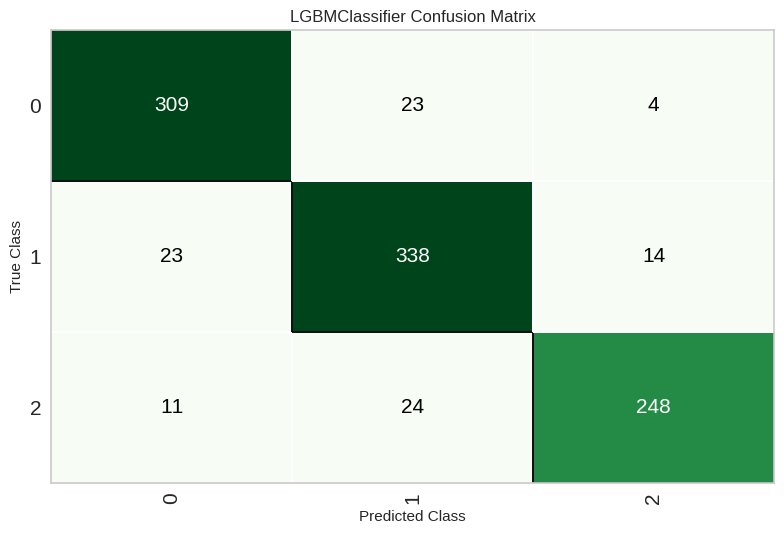

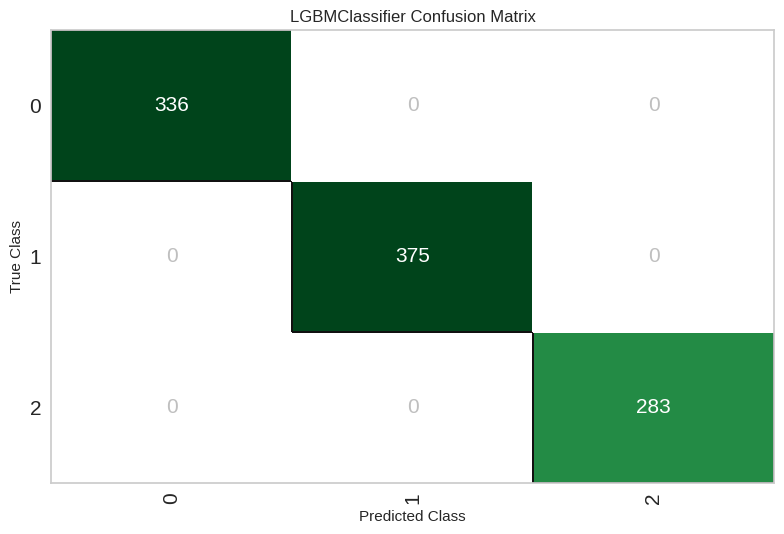

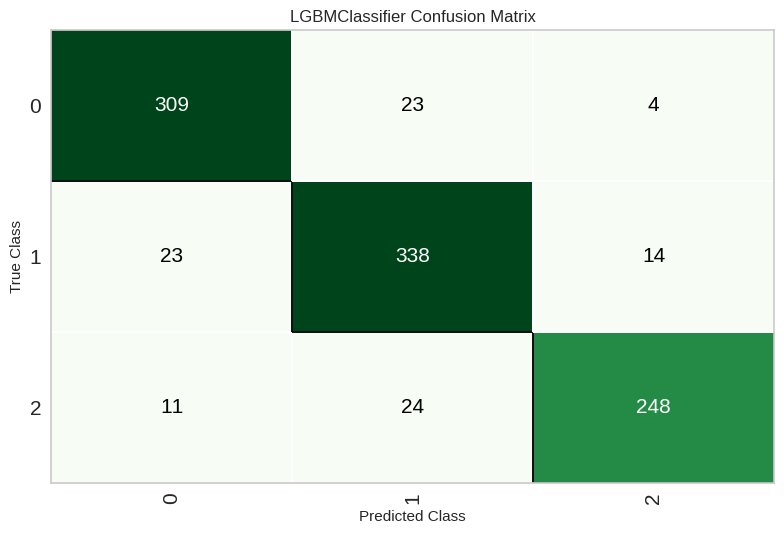

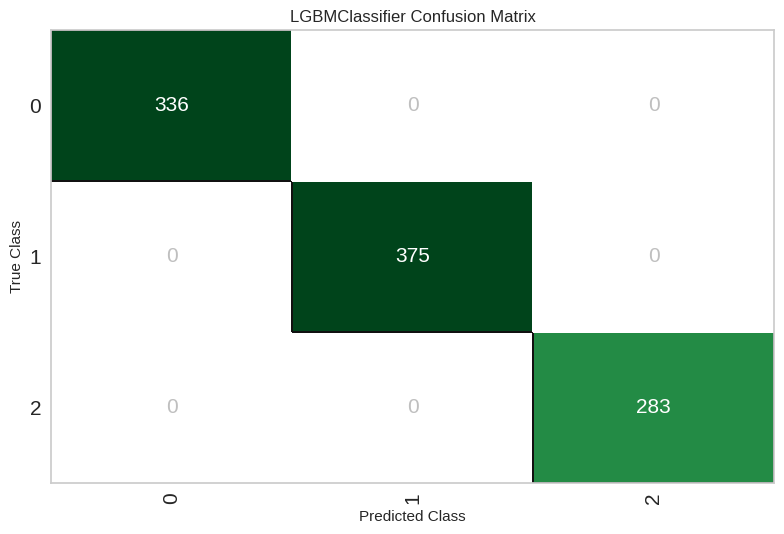

In [18]:
plot_model(lightgbm, plot = 'confusion_matrix')
plot_model(final_lightgbm, plot = 'confusion_matrix')
plot_model(tuned_lightgbm, plot = 'confusion_matrix')
plot_model(final_tuned_lightgbm, plot = 'confusion_matrix')

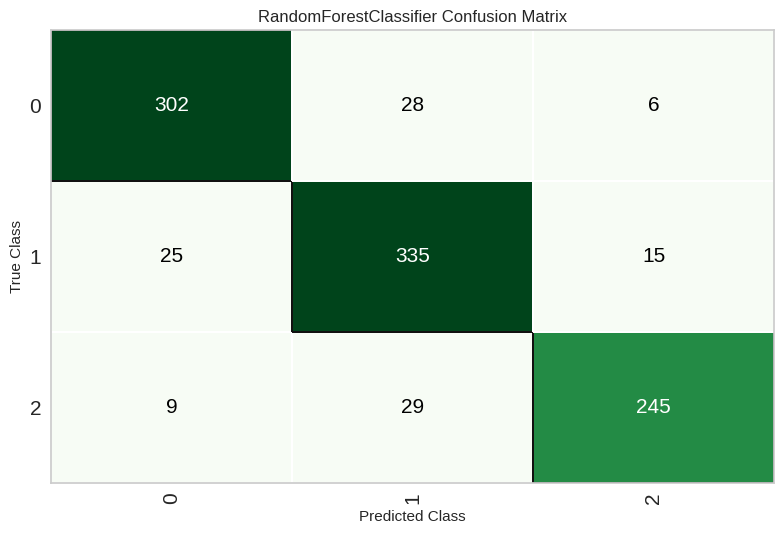

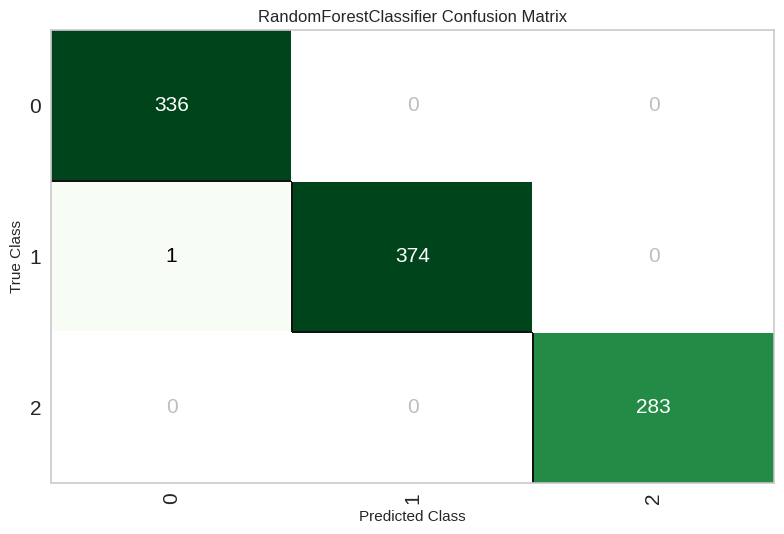

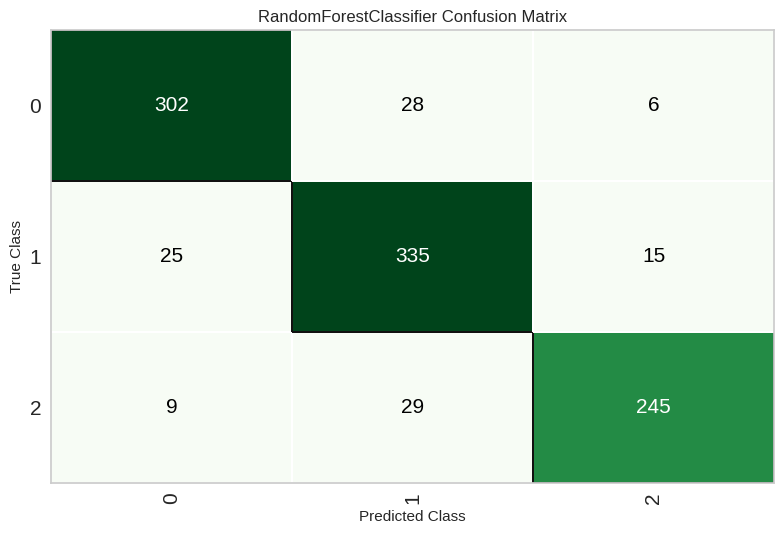

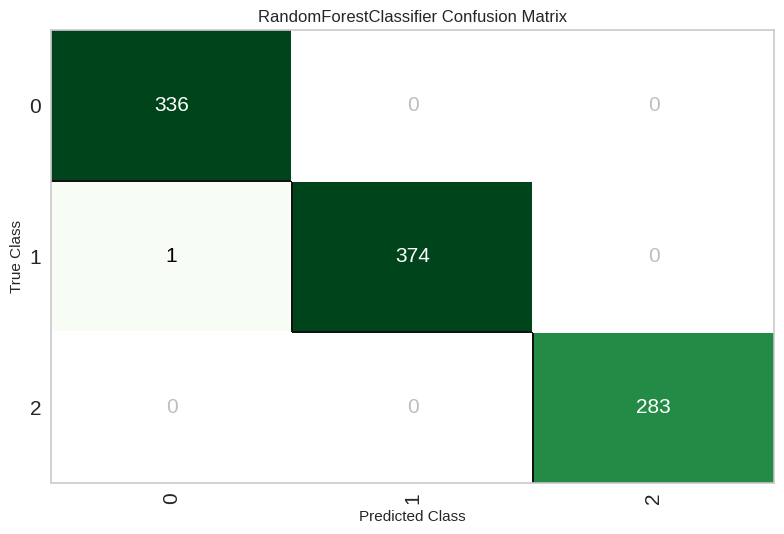

In [19]:
plot_model(rf, plot = 'confusion_matrix')
plot_model(final_rf, plot = 'confusion_matrix')
plot_model(tuned_rf, plot = 'confusion_matrix')
plot_model(final_tuned_rf, plot = 'confusion_matrix')

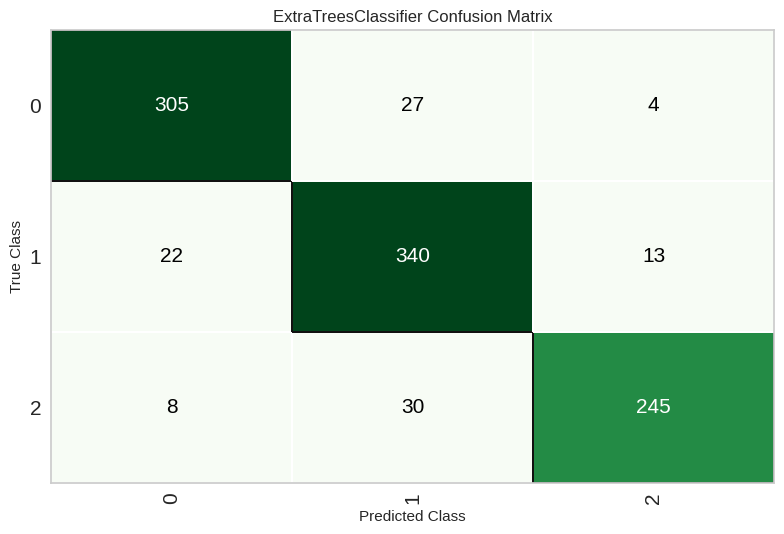

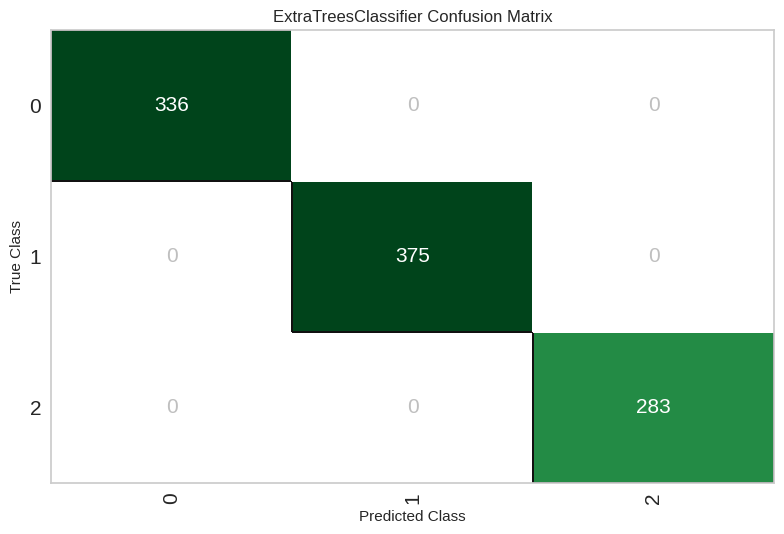

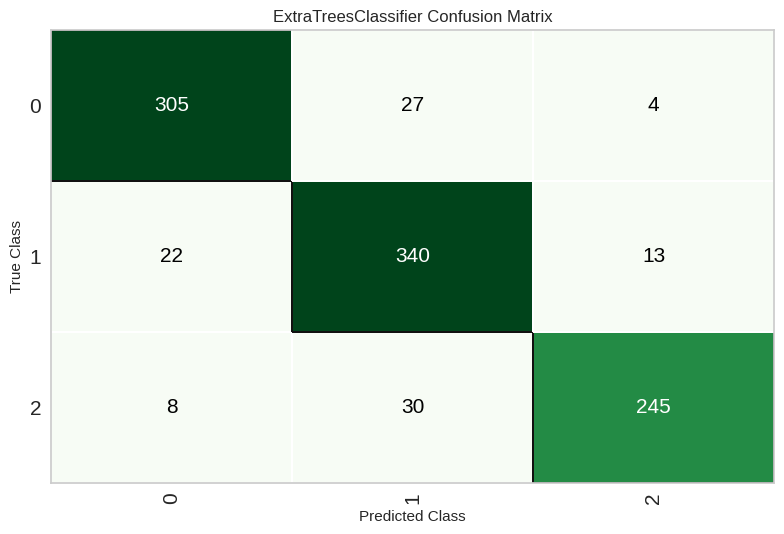

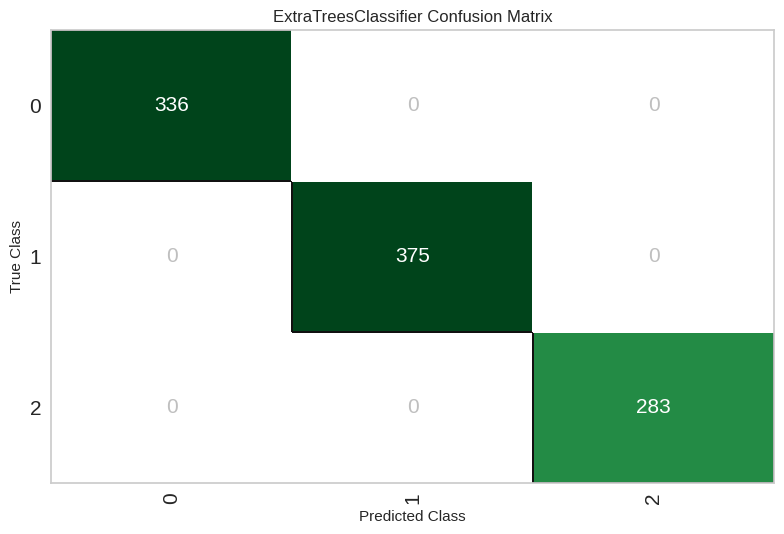

In [20]:
plot_model(et, plot = 'confusion_matrix')
plot_model(final_et, plot = 'confusion_matrix')
plot_model(tuned_et, plot = 'confusion_matrix')
plot_model(final_tuned_et, plot = 'confusion_matrix')

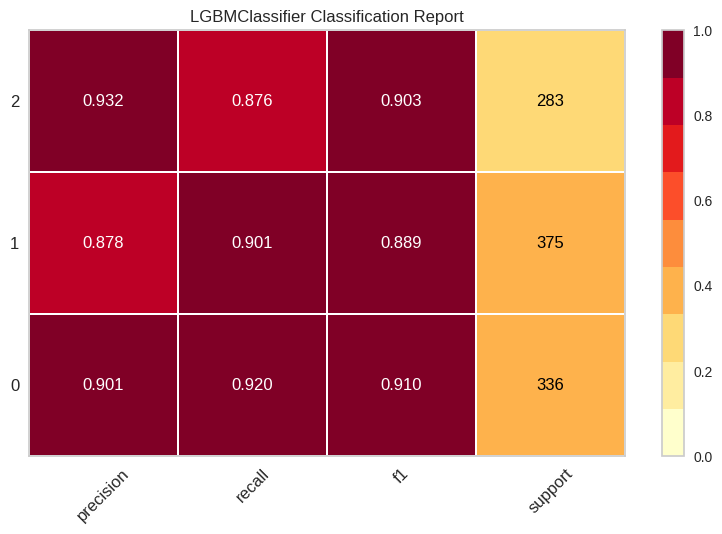

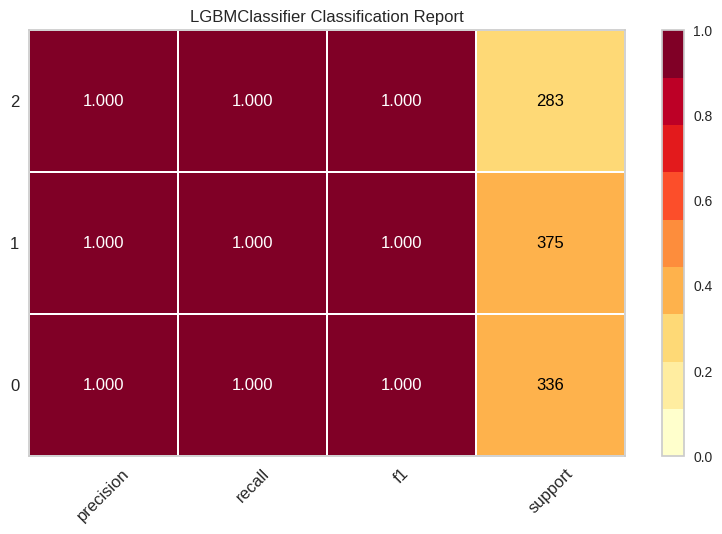

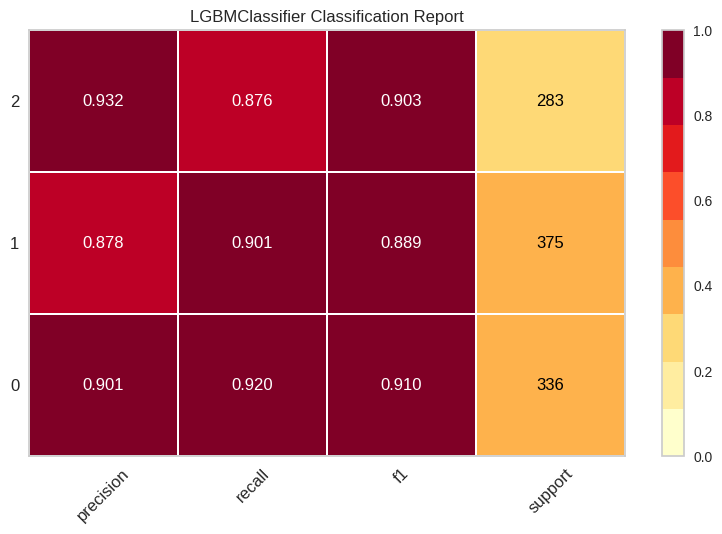

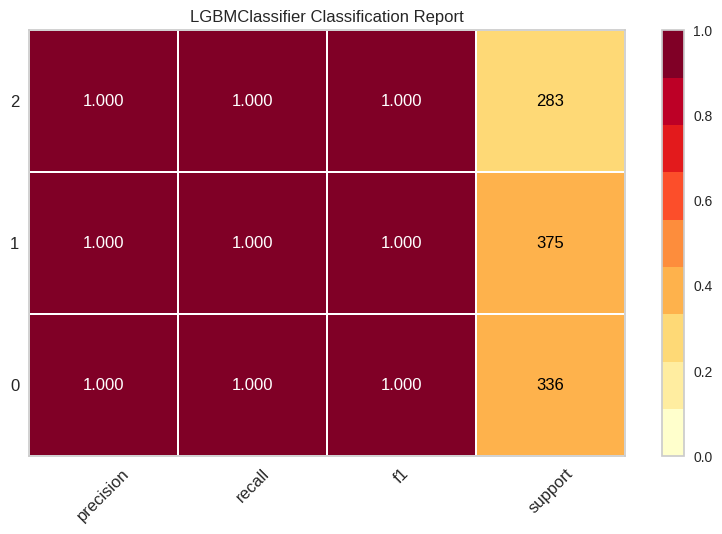

In [21]:
plot_model(lightgbm, plot = 'class_report')
plot_model(final_lightgbm, plot = 'class_report')
plot_model(tuned_lightgbm, plot = 'class_report')
plot_model(final_tuned_lightgbm, plot = 'class_report')

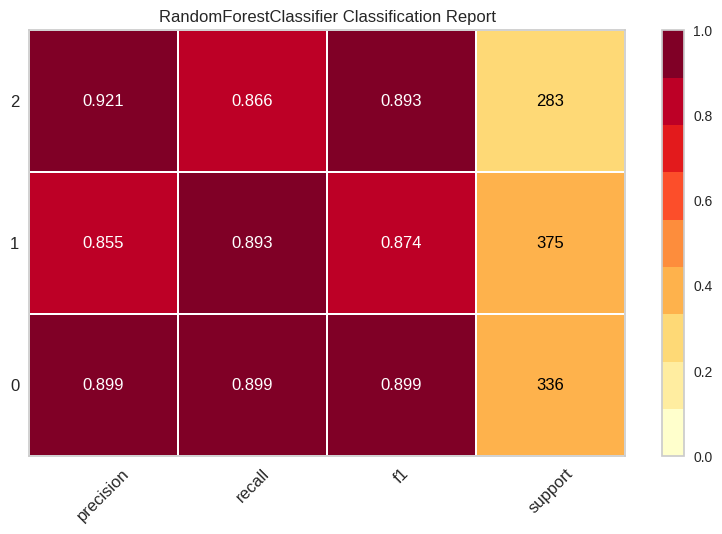

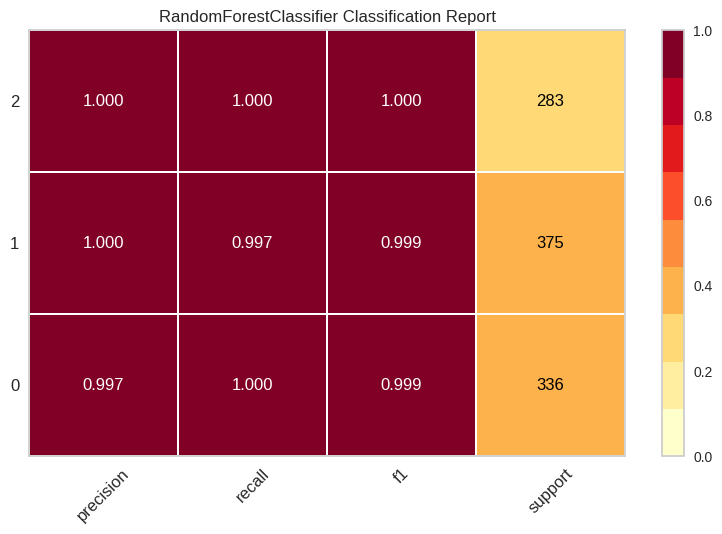

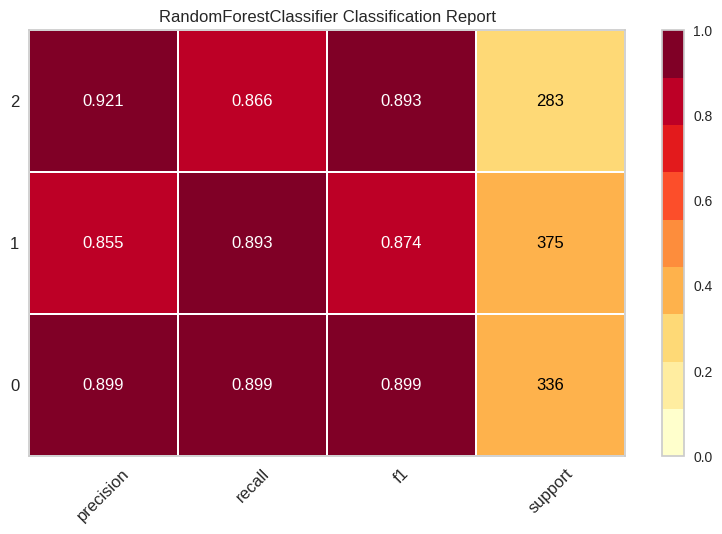

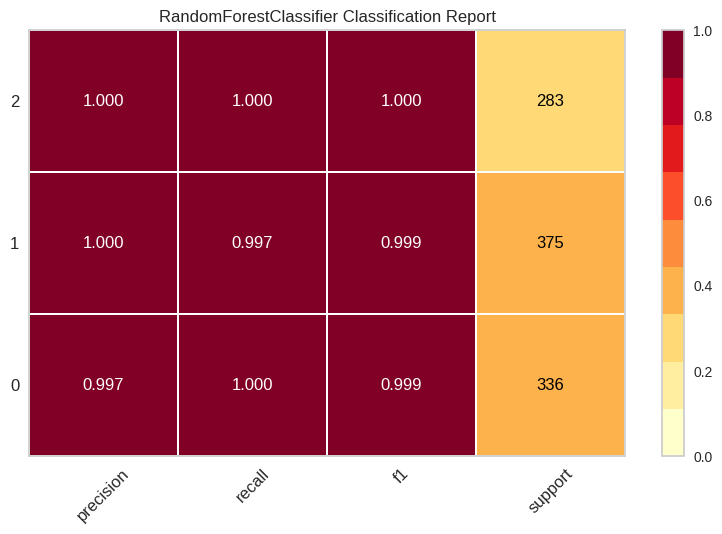

In [22]:
plot_model(rf, plot = 'class_report')
plot_model(final_rf, plot =  'class_report')
plot_model(tuned_rf, plot =  'class_report')
plot_model(final_tuned_rf, plot =  'class_report')

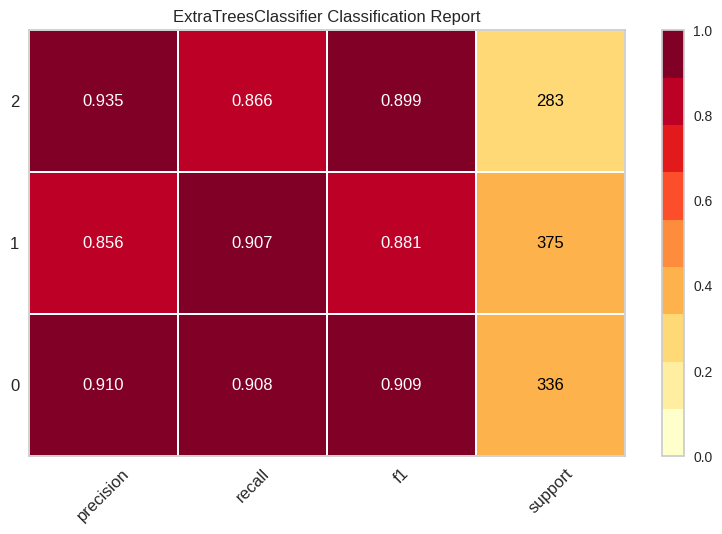

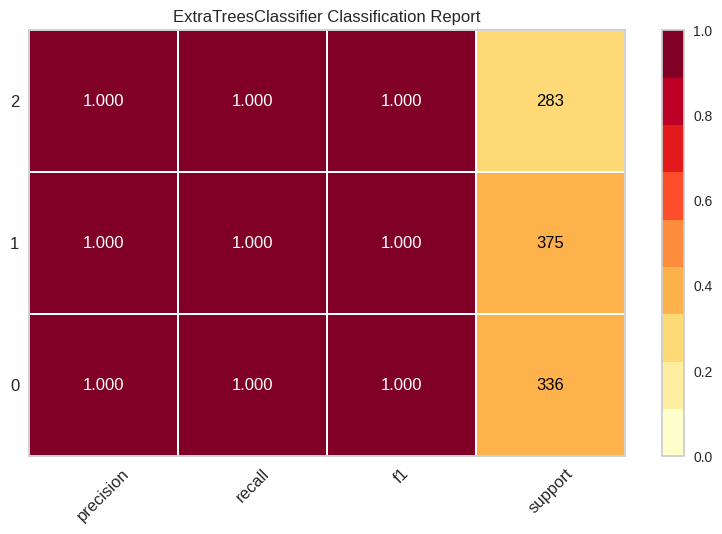

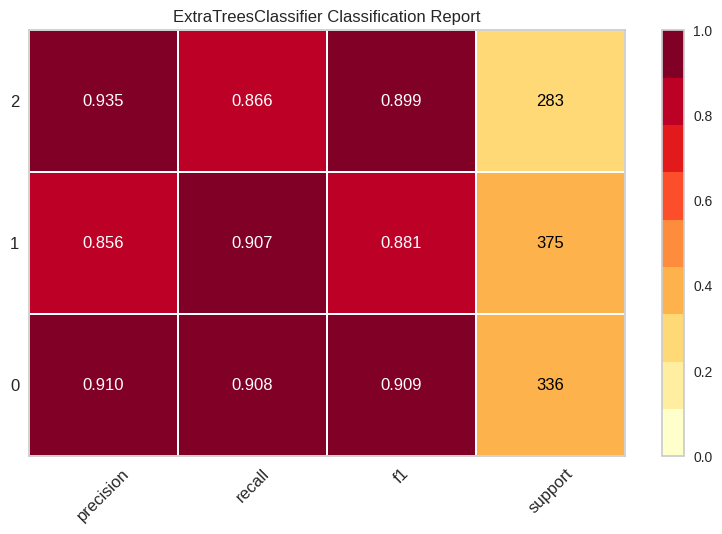

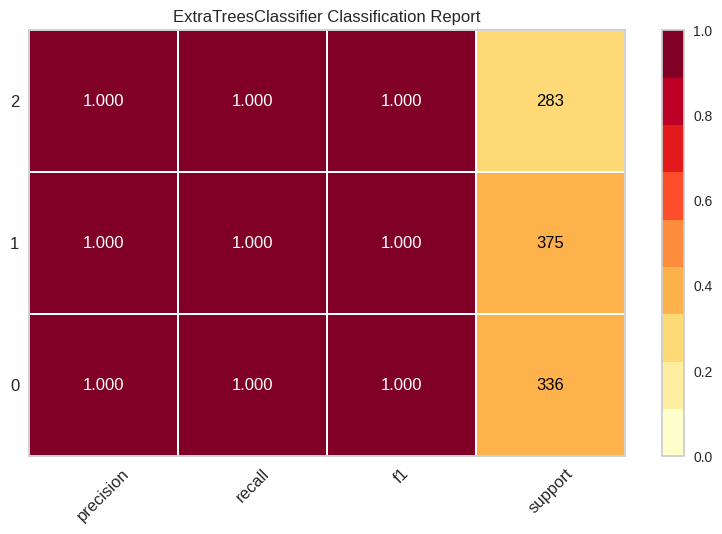

In [23]:
plot_model(et, plot = 'class_report')### lightgbm

plot_model(final_et, plot = 'class_report')
plot_model(tuned_et, plot = 'class_report')
plot_model(final_tuned_et, plot = 'class_report')

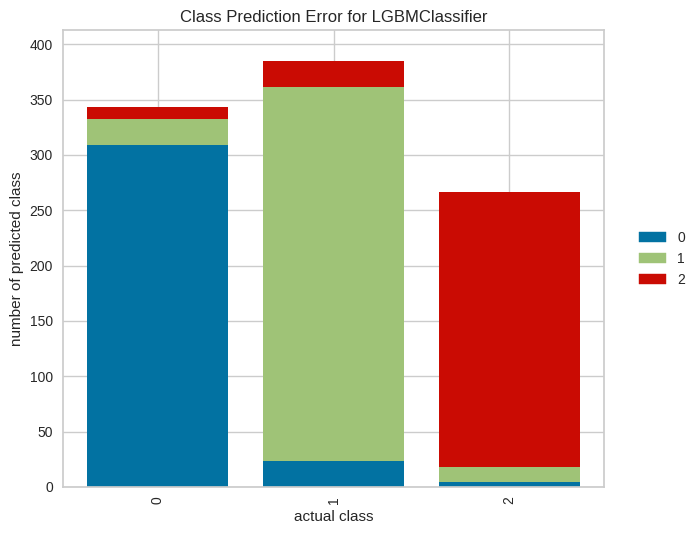

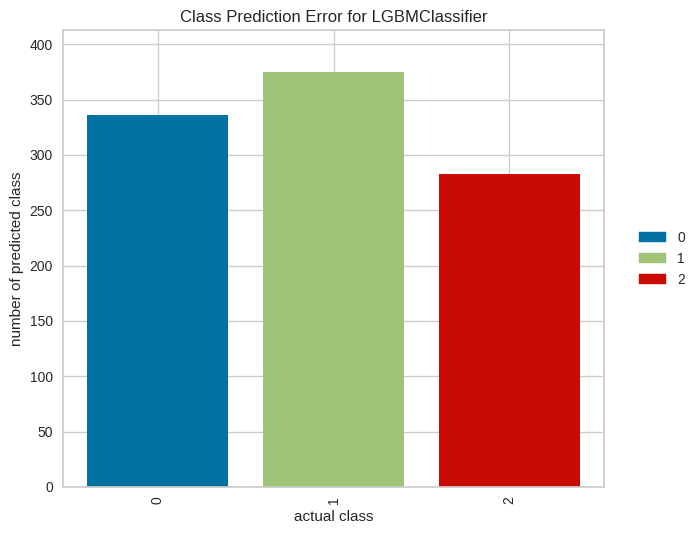

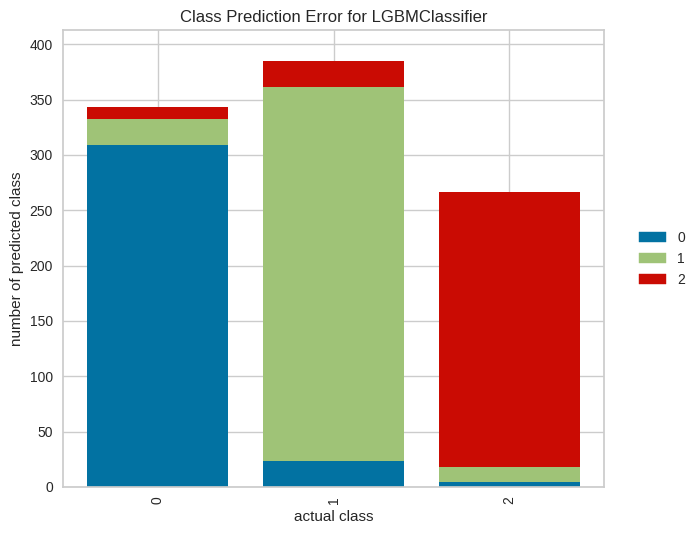

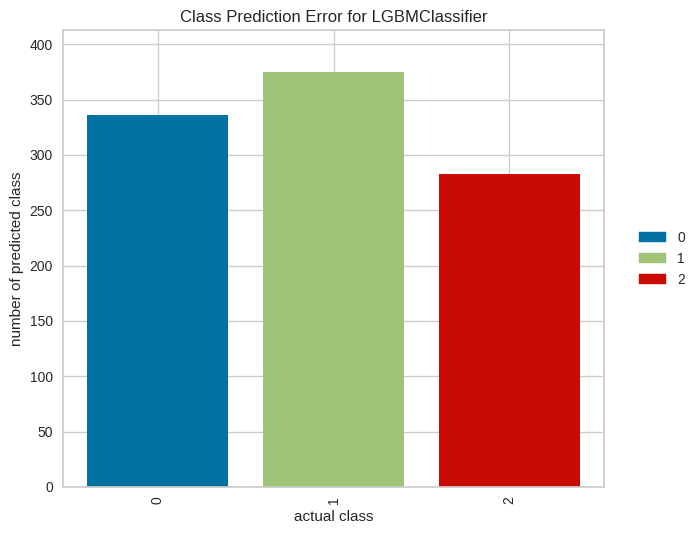

In [24]:
plot_model(lightgbm, plot = 'error')
plot_model(final_lightgbm, plot = 'error')
plot_model(tuned_lightgbm, plot = 'error')
plot_model(final_tuned_lightgbm, plot = 'error')

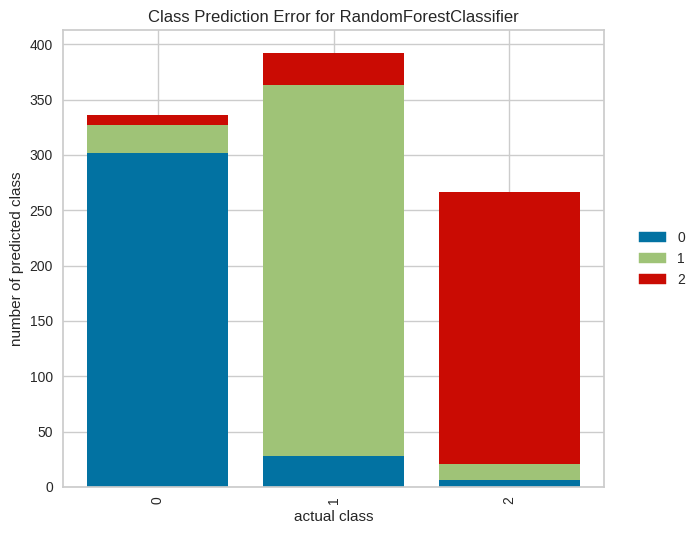

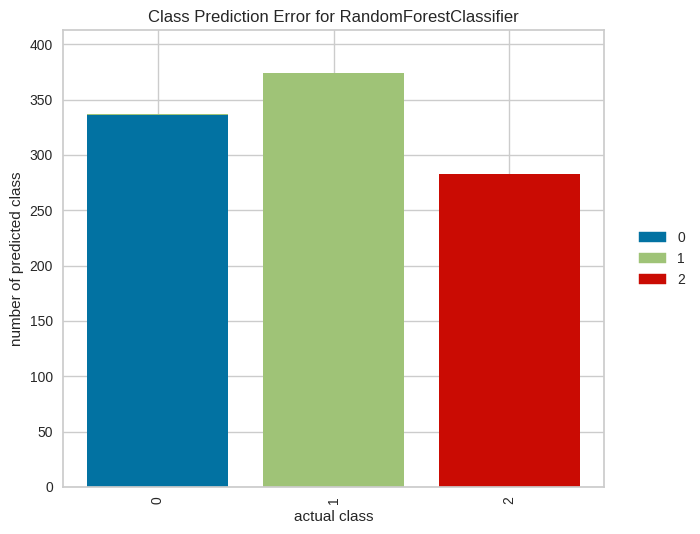

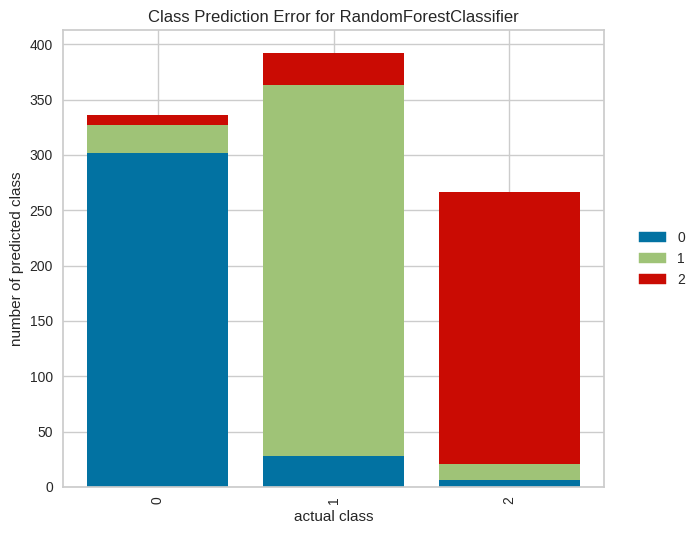

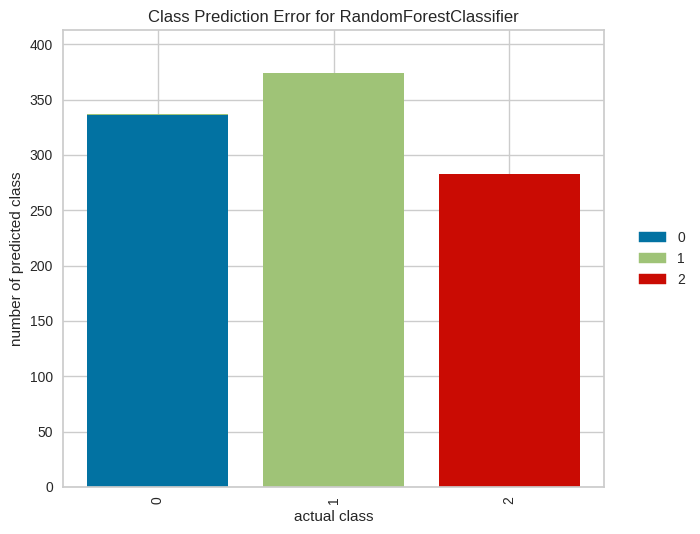

In [25]:
plot_model(rf, plot = 'error')
plot_model(final_rf, plot =  'error')
plot_model(tuned_rf, plot =  'error')
plot_model(final_tuned_rf, plot =  'error')

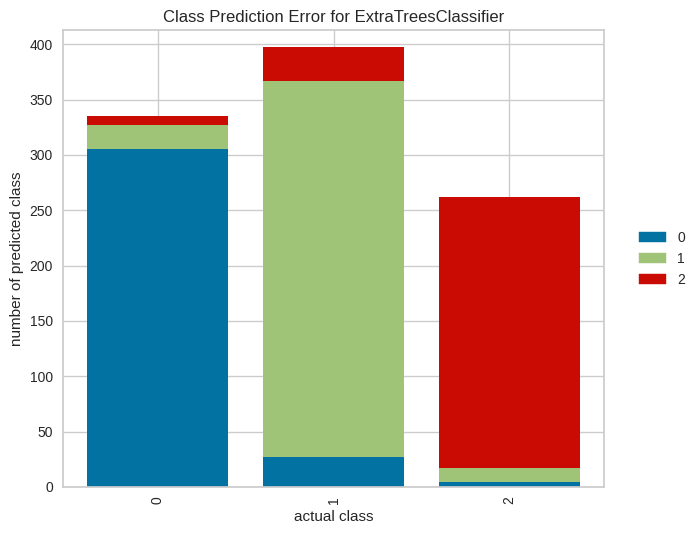

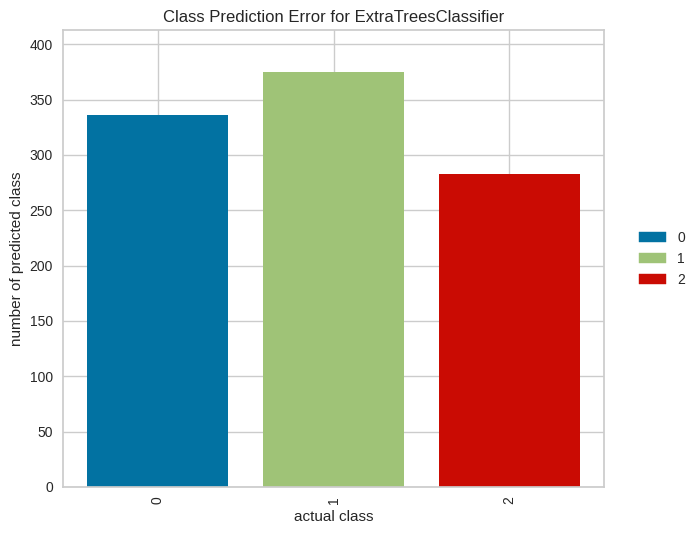

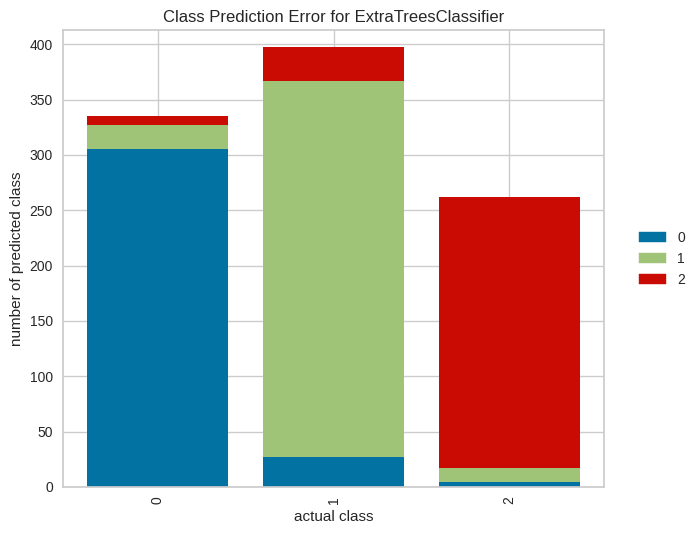

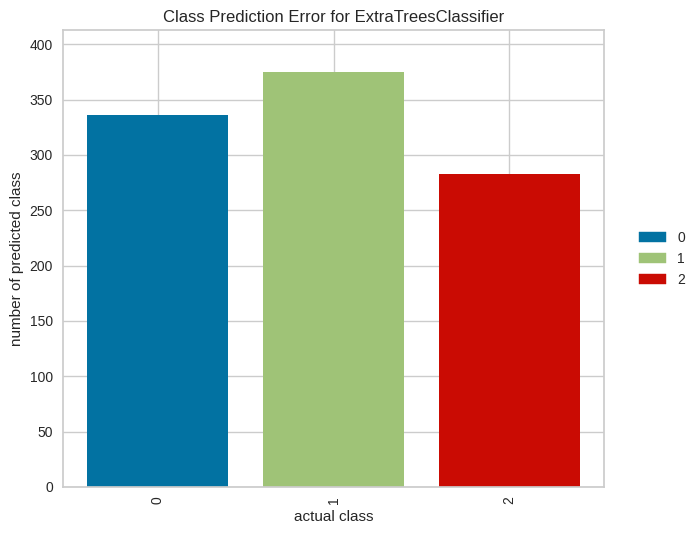

In [26]:
plot_model(et, plot = 'error')
plot_model(final_et, plot = 'error')
plot_model(tuned_et, plot = 'error')
plot_model(final_tuned_et, plot = 'error')

## Test Unseen - 1 mês

In [27]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 3M', inplace=True)

data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0

### lightgbm

In [28]:
unseen_predictions_final_lightgbm = predict_model(lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5726,0.6858,0.5726,0.5374,0.5397,0.2519,0.2639


array([[ 23,  87,   0],
       [ 10, 158,  18],
       [ 38,   3,  28]])

In [29]:
unseen_predictions_final_lightgbm = predict_model(final_lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5671,0.6317,0.5671,0.5332,0.5396,0.2565,0.2651


array([[ 23,  86,   1],
       [ 14, 148,  24],
       [ 30,   3,  36]])

In [30]:
unseen_predictions_tuned_lightgbm = predict_model(tuned_lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_tuned_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5726,0.6858,0.5726,0.5374,0.5397,0.2519,0.2639


array([[ 23,  87,   0],
       [ 10, 158,  18],
       [ 38,   3,  28]])

In [31]:
unseen_predictions_final_tuned_lightgbm = predict_model(final_tuned_lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_tuned_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5671,0.6317,0.5671,0.5332,0.5396,0.2565,0.2651


array([[ 23,  86,   1],
       [ 14, 148,  24],
       [ 30,   3,  36]])

### RF

In [32]:
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 3M', inplace=True)
unseen_predictions_rf = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5205,0.6923,0.5205,0.5128,0.5074,0.2103,0.2142


array([[ 29,  81,   0],
       [  7, 125,  54],
       [ 30,   3,  36]])

In [33]:
unseen_predictions_final_rf = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4795,0.7014,0.4795,0.4483,0.4619,0.1232,0.1241


array([[ 35,  75,   0],
       [  6, 134,  46],
       [ 60,   3,   6]])

In [34]:
unseen_predictions_tuned_rf = predict_model(tuned_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_tuned_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5205,0.6923,0.5205,0.5128,0.5074,0.2103,0.2142


array([[ 29,  81,   0],
       [  7, 125,  54],
       [ 30,   3,  36]])

In [35]:
unseen_predictions_final_tuned_rf = predict_model(final_tuned_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_tuned_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4795,0.7014,0.4795,0.4483,0.4619,0.1232,0.1241


array([[ 35,  75,   0],
       [  6, 134,  46],
       [ 60,   3,   6]])

### ET

In [36]:
unseen_predictions_et = predict_model(et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5096,0.7087,0.5096,0.3468,0.4097,0.0857,0.1001


array([[  7, 103,   0],
       [  6, 179,   1],
       [ 66,   3,   0]])

In [37]:
unseen_predictions_final_et = predict_model(final_et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6164,0.7201,0.6164,0.5870,0.5703,0.3108,0.3406


array([[ 19,  91,   0],
       [  5, 175,   6],
       [ 35,   3,  31]])

In [38]:
unseen_predictions_tuned_et = predict_model(tuned_et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_tuned_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5096,0.7087,0.5096,0.3468,0.4097,0.0857,0.1001


array([[  7, 103,   0],
       [  6, 179,   1],
       [ 66,   3,   0]])

In [39]:
unseen_predictions_final_tuned_et = predict_model(final_tuned_et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_tuned_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6164,0.7201,0.6164,0.5870,0.5703,0.3108,0.3406


array([[ 19,  91,   0],
       [  5, 175,   6],
       [ 35,   3,  31]])

## Test 2 meses

In [40]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 3M', inplace=True)
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

### lightgbm

In [41]:
unseen_predictions_lightgbm = predict_model(lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3507,0.5112,0.3507,0.2763,0.3055,-0.0383,-0.0397


array([[  7,  58,  49],
       [ 17, 119,  24],
       [ 48,  41,   2]])

In [42]:
unseen_predictions_final_lightgbm = predict_model(final_lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3589,0.5010,0.3589,0.2556,0.2951,-0.0366,-0.0391


array([[  3,  64,  47],
       [ 10, 127,  23],
       [ 45,  45,   1]])

In [43]:
unseen_predictions_tuned_lightgbm = predict_model(tuned_lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_tuned_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3507,0.5112,0.3507,0.2763,0.3055,-0.0383,-0.0397


array([[  7,  58,  49],
       [ 17, 119,  24],
       [ 48,  41,   2]])

In [44]:
unseen_predictions_final_tuned_lightgbm = predict_model(final_tuned_lightgbm, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_tuned_lightgbm['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3589,0.5010,0.3589,0.2556,0.2951,-0.0366,-0.0391


array([[  3,  64,  47],
       [ 10, 127,  23],
       [ 45,  45,   1]])

### rf

In [45]:
unseen_predictions_rf = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3479,0.5050,0.3479,0.3005,0.3182,-0.0285,-0.0292


array([[  9,  52,  53],
       [ 16, 110,  34],
       [ 42,  41,   8]])

In [46]:
unseen_predictions_final_rf = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3562,0.5408,0.3562,0.2959,0.3177,-0.0298,-0.0309


array([[ 11,  62,  41],
       [ 22, 112,  26],
       [ 40,  44,   7]])

In [47]:
unseen_predictions_tuned_rf = predict_model(tuned_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_tuned_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3479,0.5050,0.3479,0.3005,0.3182,-0.0285,-0.0292


array([[  9,  52,  53],
       [ 16, 110,  34],
       [ 42,  41,   8]])

In [48]:
unseen_predictions_final_tuned_rf = predict_model(final_tuned_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_tuned_rf['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3562,0.5408,0.3562,0.2959,0.3177,-0.0298,-0.0309


array([[ 11,  62,  41],
       [ 22, 112,  26],
       [ 40,  44,   7]])

### et

In [49]:
unseen_predictions_et = predict_model(et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4274,0.5684,0.4274,0.2980,0.3347,0.0448,0.0523


array([[  8,  81,  25],
       [  8, 145,   7],
       [ 41,  47,   3]])

In [50]:
unseen_predictions_final_et = predict_model(final_et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4082,0.5879,0.4082,0.2716,0.3157,0.0162,0.0187


array([[  5,  79,  30],
       [  9, 142,   9],
       [ 40,  49,   2]])

In [51]:
unseen_predictions_tuned_et = predict_model(tuned_et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_tuned_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4274,0.5684,0.4274,0.2980,0.3347,0.0448,0.0523


array([[  8,  81,  25],
       [  8, 145,   7],
       [ 41,  47,   3]])

In [52]:
unseen_predictions_final_tuned_et = predict_model(final_tuned_et, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions_final_tuned_et['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4082,0.5879,0.4082,0.2716,0.3157,0.0162,0.0187


array([[  5,  79,  30],
       [  9, 142,   9],
       [ 40,  49,   2]])

In [53]:
data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,0.216315,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,0.410766,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,-1
2,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,0.410787,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,-1
3,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,0.411428,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,-1
4,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,0.411653,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.008526,0.009829,0.090006,0.219506,0.126052,0.147027,0.132832,0.146756,0.159573,0.190037,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,0
4966,-0.001198,0.005155,0.073624,0.158917,-0.214027,0.128773,0.124416,0.138134,0.152219,0.185158,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,0
4967,0.006550,0.002418,0.069846,0.198901,0.096558,0.147057,0.135088,0.147830,0.155002,0.184016,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,0
4968,0.007336,0.004868,0.075214,0.211160,0.119807,0.146854,0.134897,0.147623,0.154768,0.183797,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,0


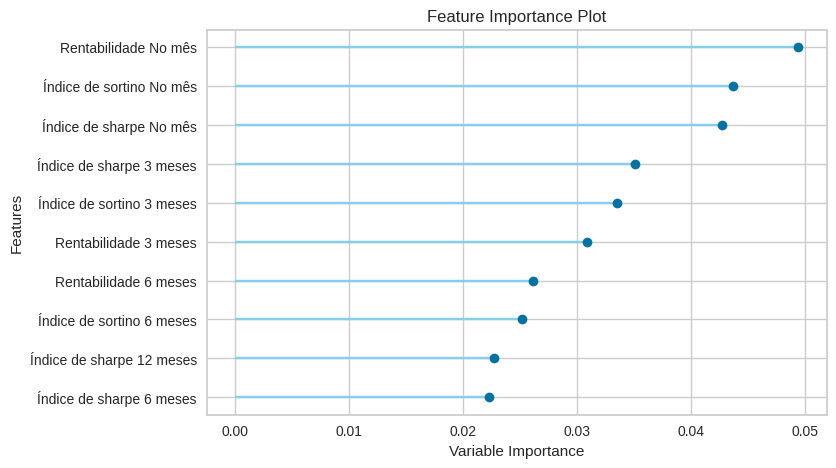

In [54]:

plot_model(final_et, plot = 'feature')

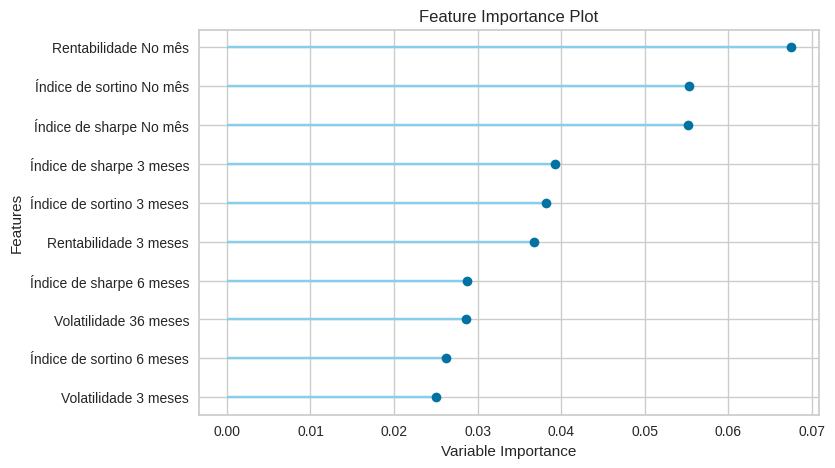

In [55]:
plot_model(final_rf, plot = 'feature')

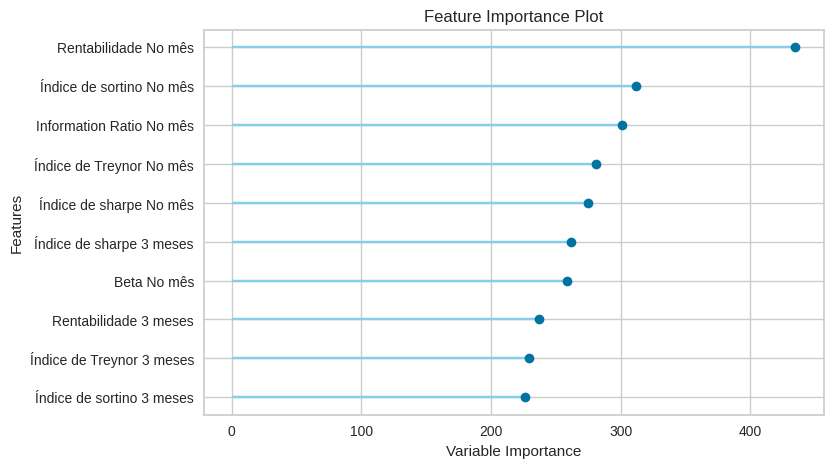

In [56]:
plot_model(final_lightgbm, plot = 'feature')

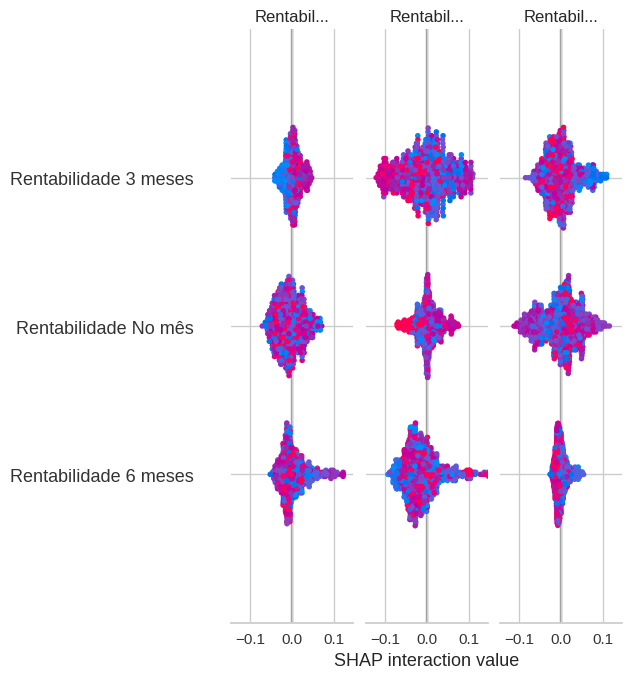

In [57]:
# interpret summary model
interpret_model(et, plot = 'summary')